In [65]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
data = pd.read_csv('nt-1012.csv',header=0)
data.head()
list(data)
print (data.shape)

(30000, 26)


In [67]:
data.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_6,PAY_5,PAY_4,...,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,TARGET
0,0,1,20000,2,2,1,24,1,1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,2,120000,2,2,2,26,-1,1,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,2,3,90000,2,2,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,3,4,50000,2,2,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,4,5,50000,1,2,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [68]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [69]:
print (list(data))

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'TARGET']


In [70]:
data['TOTAL_MONTHS_DELAYED'] = data['PAY_1'] + data['PAY_2'] + data['PAY_3'] + data['PAY_4'] + data['PAY_5'] + data['PAY_6'] 
data['TOTAL_BILL_AMT'] = data['BILL_AMT6'] + data['BILL_AMT5'] + data['BILL_AMT4'] + data['BILL_AMT3'] + data['BILL_AMT2'] + data['BILL_AMT1']
data['TOTAL_PAIED_AMT'] = data['PAY_AMT6'] + data['PAY_AMT5'] + data['PAY_AMT4'] + data['PAY_AMT3'] + data['PAY_AMT2'] + data['PAY_AMT1']

In [71]:
print (data['TARGET'].value_counts())
print (list(data))

0    23364
1     6636
Name: TARGET, dtype: int64
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_6', 'PAY_5', 'PAY_4', 'PAY_3', 'PAY_2', 'PAY_1', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1', 'PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4', 'PAY_AMT3', 'PAY_AMT2', 'PAY_AMT1', 'TARGET', 'TOTAL_MONTHS_DELAYED', 'TOTAL_BILL_AMT', 'TOTAL_PAIED_AMT']


In [72]:
X = data.iloc[:, data.columns != 'TARGET']
y = data.iloc[:, data.columns == 'TARGET']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [74]:
print("Original number transactions train dataset: ", len(X_train))
print("Original number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))


('Original number transactions train dataset: ', 21000)
('Original number transactions test dataset: ', 9000)
('Total number of transactions: ', 30000)


In [75]:
print(type(y_train))
print(type(y_test))
print(type(X_train))
print(type(X_test))
unique_train, counts_train = np.unique(y_train, return_counts=True)
print (dict(zip(unique_train, counts_train)))
unique_test, counts_test = np.unique(y_test, return_counts=True)
print (dict(zip(unique_test, counts_test)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
{0: 16304, 1: 4696}
{0: 7060, 1: 1940}


In [76]:
# Number of data points in the minority class
number_records_default = len(data[data.TARGET == 1])
print ("Number of records default : ", number_records_default)
default_indices = np.array(data[data.TARGET == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.TARGET == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_default, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([default_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'TARGET']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'TARGET']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.TARGET == 0])/float(len(under_sample_data)))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.TARGET == 1])/float(len(under_sample_data)))
print("Total number of transactions in resampled data: ", len(under_sample_data))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

('Number of records default : ', 6636)
('Percentage of normal transactions: ', 0.5)
('Percentage of fraud transactions: ', 0.5)
('Total number of transactions in resampled data: ', 13272)

('Number transactions train dataset: ', 9290)
('Number transactions test dataset: ', 3982)
('Total number of transactions: ', 13272)


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 

In [104]:
def printing_Kfold_scores(x_train_data,y_train_data):
    fold = KFold(len(y_train_data),5,shuffle=False) 
    print (fold)
    # Different C parameters
    c_param_range = [20,21,22,23,24]

    results_table = pd.DataFrame(index = range(len(c_param_range),2), columns = ['C_parameter','Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # the k-fold will give 2 lists: train_indices = indices[0], test_indices = indices[1]
    j = 0
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('C parameter: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []
        for iteration, indices in enumerate(fold,start=1):

            # Call the logistic regression model with a certain C parameter
            #lr = DecisionTreeClassifier(max_depth= c_param)
            lr = RandomForestClassifier(n_estimators= 17,max_depth=c_param)

            # Use the training data to fit the model. In this case, we use the portion of the fold to train the model
            # with indices[0]. We then predict on the portion assigned as the 'test cross validation' with indices[1]
            lr.fit(x_train_data.iloc[indices[0],:],y_train_data.iloc[indices[0],:].values.ravel())

            # Predict values using the test indices in the training data
            y_pred_undersample = lr.predict(x_train_data.iloc[indices[1],:].values)

            # Calculate the recall score and append it to a list for recall scores representing the current c_parameter
           # recall_acc = recall_score(y_train_data.iloc[indices[1],:].values,y_pred_undersample)
            recall_acc = roc_auc_score(y_train_data.iloc[indices[1],:],y_pred_undersample)
            recall_accs.append(recall_acc)
            print('Iteration ', iteration,': recall score = ', recall_acc)

        # The mean value of those recall scores is the metric we want to save and get hold of.
        results_table.ix[j,'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('Mean recall score ', np.mean(recall_accs))
        print('')

    best_c = results_table.loc[results_table['Mean recall score'].idxmax()]['C_parameter']
    
    # Finally, we can check which C parameter is the best amongst the chosen.
    print('*********************************************************************************')
    print('Best model to choose from cross validation is with C parameter = ', best_c)
    print('*********************************************************************************')
    
    return best_c

In [105]:
best_c = printing_Kfold_scores(X_train_undersample,y_train_undersample)

sklearn.cross_validation.KFold(n=9290, n_folds=5, shuffle=False, random_state=None)
-------------------------------------------
('C parameter: ', 20)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.6911062831320065)
('Iteration ', 2, ': recall score = ', 0.69952371019329718)
('Iteration ', 3, ': recall score = ', 0.69771244102079211)
('Iteration ', 4, ': recall score = ', 0.67793146535886029)
('Iteration ', 5, ': recall score = ', 0.69295915055408719)

('Mean recall score ', 0.6918466100518087)

-------------------------------------------
('C parameter: ', 21)
-------------------------------------------



C:\Users\Lenovo\Anaconda2\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


('Iteration ', 1, ': recall score = ', 0.68681440282726447)
('Iteration ', 2, ': recall score = ', 0.69569832661196862)
('Iteration ', 3, ': recall score = ', 0.69222586835006539)
('Iteration ', 4, ': recall score = ', 0.6989609570693518)
('Iteration ', 5, ': recall score = ', 0.67968539898919644)

('Mean recall score ', 0.69067699076956934)

-------------------------------------------
('C parameter: ', 22)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.69921902610005504)
('Iteration ', 2, ': recall score = ', 0.68490705975061417)
('Iteration ', 3, ': recall score = ', 0.70091863882013772)
('Iteration ', 4, ': recall score = ', 0.69670297444005391)
('Iteration ', 5, ': recall score = ', 0.67937705754161448)

('Mean recall score ', 0.69222495133049511)

-------------------------------------------
('C parameter: ', 23)
-------------------------------------------

('Iteration ', 1, ': recall score = ', 0.69057501231134666)
('Iteration ', 2, ': recall

('the recall for this model is :', 0.68717683557394005)
('TP', 1329)
('TN', 1221)
('FP', 827)
('FN', 605)


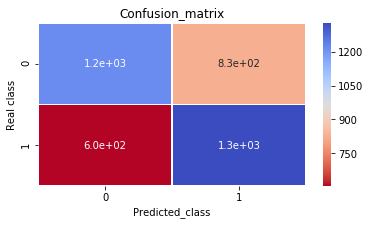

In [80]:
lr = LogisticRegression(C = best_c, penalty = 'l1') # l2 is about 90% recall
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# Compute and plot confusion matrix
cnf_matrix = confusion_matrix(y_test_undersample,y_pred_undersample)
print("the recall for this model is :",cnf_matrix[1,1]/float((cnf_matrix[1,1]+cnf_matrix[1,0])))
fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

('the recall for this model is :', 0.68917525773195876)
('TP', 1337)
('TN', 4268)
('FP', 2792)
('FN', 603)


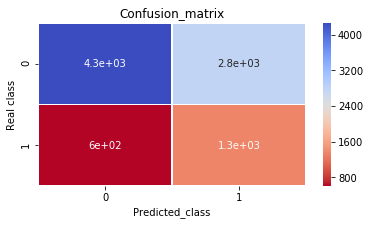

In [81]:
# Use this C_parameter to build the model with the sampling dataset and predict the classes in the whole test dataset
lr = LogisticRegression(C = best_c, penalty = 'l1')
lr.fit(X_train_undersample,y_train_undersample.values.ravel())
y_pred = lr.predict(X_test)

# Compute and plot confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)

print("the recall for this model is :",cnf_matrix[1,1]/float((cnf_matrix[1,1]+cnf_matrix[1,0])))
fig= plt.figure(figsize=(6,3))# to plot the graph
print("TP",cnf_matrix[1,1,]) # no of fraud transaction which are predicted fraud
print("TN",cnf_matrix[0,0]) # no. of normal transaction which are predited normal
print("FP",cnf_matrix[0,1]) # no of normal transaction which are predicted fraud
print("FN",cnf_matrix[1,0]) # no of fraud Transaction which are predicted normal
sns.heatmap(cnf_matrix,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()

In [82]:
roc=roc_auc_score(y_test,y_pred)
print (roc)

0.646853917818
